In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from wavelen2rgb import wavelen2rgb
from scipy.optimize import leastsq

In [100]:
def logistic4(x, A, B, C, D):
    """4PL logistic equation."""
    return ((A-D)/(1.0+((x/C)**B))) + D

def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A,B,C,D = p
    err = y-logistic4(x, A, B, C, D)
    return err

def peval(x, p):
    """Evaluated value at x with current parameters."""
    A,B,C,D = p
    return logistic4(x, A, B, C, D)

In [43]:
df = pd.read_excel(r'brainard2001_actionSpectrum.xlsx')

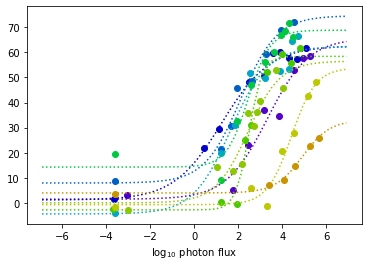

In [178]:
groups = df.groupby('Wavelength')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
ax.set_xlabel(r'log$_{10}$ photon flux')
for name, group in groups:
    # Extract RGB
    rgb = [wavelen2rgb(name, MaxIntensity=200)]
    
    # Plot
    ax.plot(np.log(group['Stimulus photon density']), group['Melatonin suppression [%], Mean'], color=np.asarray(rgb[0])/255.0, marker='o', linestyle='', ms=6, label=name)
    
    # Fit function
    p0 = [100, 1, 30, 0] # Initial guess
    plsq = leastsq(residuals, p0, args=(group['Melatonin suppression [%], Mean'], group['Stimulus photon density']))

    # Plot fit
    xtest = np.logspace(-3, 3, num=50)
    plt.plot(np.log(xtest), peval(xtest,plsq[0]), ':', color=np.asarray(rgb[0])/255.0)

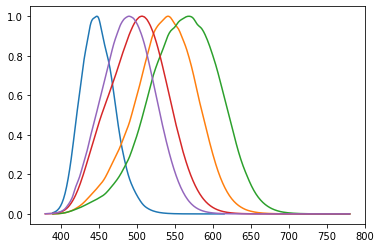

In [221]:
# CIE curves - how to best define it
cie = pd.read_csv(r'cies026.csv')
fig, ax = plt.subplots()
plt.plot(cie.Wavelength, cie.sCone)
plt.plot(cie.Wavelength, cie.mCone)
plt.plot(cie.Wavelength, cie.lCone)
plt.plot(cie.Wavelength, cie.rod)
plt.plot(cie.Wavelength, cie.mel)